![My Logo](https://thoughtsociety.org/wp-content/uploads/2019/03/ts_notebook_header.png)

# Natural Language Processing

## Overview

Natural Language Processing is instrumented by well understood linguistic methodologies. It can be very complicated but we are in luck. Much of the grammatical and linguistic machinations are tooled by NLTK - The natural language tool kit. The [NLTK Docs](https://www.nltk.org/) are a good read but it helps to go basic when starting out or you will be pulled into an interesting rabbit hole for sure. 

My suggestion is that you **first read** The [Natural Language Wikipedia Page](https://en.wikipedia.org/wiki/Natural_language_processing) which provides a thorough compendium of NLP.

The basic concept is that we can use Machine Learning algorithms to predict targets from unlabeled text once it has been transformed into vectors. We can use features of our corpus (document) to give weights to meaningful words or phrases found there and to gauge accuracy just as we do with purely numerical datasets. Numerous ML models and algorithms can be applied to NLP including deep learning. 

Three big concepts you will need to understand for the most basic NLP exercises:

[Bag of Words (BOW)](https://en.wikipedia.org/wiki/Bag-of-words_model) 

[Word Vectorization](https://blog.theodo.com/2017/09/day-words-became-vectors/)

[TfIdf - Term frequency Iverse document frequency](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)

Scikitlearn has good documentation covering its [NLP functionality](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html).

For the most part, Bag-Of-Words, text tokenization, pipelining and classification are made easier with SKL's text methods.



Just a few applications of NLP:

* Natural Language Understanding
* Named Entity Recognition
* Question answering
* Sentiment analysis
* Auto-Summarization
* Speech Recognition

There are a lot of Python projects in open source that will make it less painful to start out with NLP. I recoommend the [great work of Harrison Kinsley](https://Pythonprogramming.net) who has also implemented a very extensive [sentiment analysis site](http://sentdex.com).

There are also quite a few [kernels and datasets to play with on Kaggle](https://kaggle.com)





## Yelp Reviews

This project will introduce several basic concepts of NLP with both Scikitlearn and the NLTK which will become goto tools for your NLP pursuits. You could use news datasets, pdf documents or closed-caption dumps of videos. All the concepts apply.

### Concept

Yelp reviews can carry relevant user feedback within. A high rating or 5-stars tends to represent a favored restaurant while 1-star is unfavorable. There are other indicators in a review that can be used to predict the rating of a review.

With Natural Language Processing, we might be able to predict 1 or 5 star reviews based on frequently used words in the review. Stars will be our target dependent variable or 'label'.


### NLP with a few tools to help

When we first see the yelp reviews, they are the full text with punctuation. In order to understand what the data represents, we can do some EDA. We can look at the frequency of different star ratings, cool, useful and funny ratings. 

As part of our EDA, we will use **matplotlib subplots, seaborn charts and wordclouds** which we can compare with **word frequency distribution graphs** to see what words in the review stand out in a good review.

From this we can learn something about the reviews, what gets a 1 or a 5 and then go ahead and try to model this based on the text itself. 

We will create a function to perform both the **stop word and de-punctuation** that can be called with the **'.apply' method** on messages. In this scenario, we will use **NLTK - Natural Language Tool Kit** stopword list and the Python 'string' library to remove punctuation.

Before we try to predict the target, we can reduce our stars in the dataframe to just 1 and 5 since that is going to inform our actions to improve the restaurant better than 2-3-4 stars would. 


### What we plan to do

This notebook will demonstrate how we reduce noise in the corpus, remove stopwords with **NLTK** and then use **scikitlearn classifiers** in a pipeline for word frequency analysis to predict either 1 or 5 stars.

The classifiers we will use require us to first **vectorize** the messages. 

We can then apply **MultinomialNB** or the [Multinomial naive bayes algorithm as applied to nlp](https://medium.com/syncedreview/applying-multinomial-naive-bayes-to-nlp-problems-a-practical-explanation-4f5271768ebf) on the vectorized words. 

As an experiment, we will pipeline three processing steps including **TfidfTransformer, bag of words CountVectorizer and MultinomialNB** and see if this produces high accuracy. 

Scikitlearn has a **pipeline method** that allows us to save code steps by *inserting transformers and a final estimator into a processing pipeline* that is executed in one go.  This is useful when testing different approaches to a classification effor since it allows one to **manipulate combinations of steps** and look at the results without a heap of code.

After this, we will remove the **tfidf weighting** from the pipeline and run it with just **CountVectorizer and MultinomialNB** to see our final results.

At the end of a training and prediction pipeline, we will run a **classification report on test vs prediction** to determine the accuracy of our model.

In a real-world situation, this model could be used by a restaurant to figure out which practices to retain vs. those it should improve on based on star prediction of reviews.

### Dataset Description

The Yelp dataset consists of these 10 features:

* business_id
* date
* review_id
* stars
* text
* type
* user_id
* cool
* useful
* funny

In its current layout, this dataframe needs to be reorganized without business_id, date,review_id and user_id in order for our exercise to work.

There are:

10,000 observations with 10 features or columns.

It consists of review text along with the reviewer's rating of a restaurant and some social reactions to the review itself by other members.

As we will see, some of the catchwords within a review and the number of stars tell us more about a restaurant's quality than the social reactions to the review.

## Some kudos to others:

This Kernel has had so many hands on it in so many ways over time.
It is worth mentioning a couple pair of those just to credit their work here.

The current kernel is expanded from [Zhenyu on Kaggle](https://www.kaggle.com/zhenyufan) whose [cool kernel](https://www.kaggle.com/zhenyufan/nlp-for-yelp-reviews/notebook) goes the distance to ring out the yelp dataset.
He also demonstrates the [Andreas Mueller wordcloud library.](https://pypi.org/project/wordcloud/) that if properly setup, does a nice job of providing yet another EDA step that helps with NLP.

In [Jose Portilla's Udemy Python Data Science and Machine Learning Bootcamp, NLP section](https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/), I saw some functions and bits and pieces a year ago that found their way into Zhenyu Fan's kernel.

This just goes to show how we are able to accelerate our learning paths with open source collaboration.


Do our imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/salvideoguy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Timer module

import time

In [3]:
yelp_df = pd.read_csv('https://raw.githubusercontent.com/thoughtsociety/ads_track4/master/datasets/yelp.csv')
yelp_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


## Exploratory Data Analysis

### Basic Operations for Data
Let's drop unnecessary features, Keep the ones we need and rename others for clarity

In [4]:
yelp_df = yelp_df.drop(['business_id', 'date', 'review_id', 'type', 'user_id'], axis=1)
yelp_df = yelp_df.rename(columns={'stars':'Stars', 'text':'Text', 'cool':'Cool'
                                  , 'useful':'Useful', 'funny':'Funny'})
yelp_df.head()

,Stars,Text,Cool,Useful,Funny
0,5,My wife took me here on my birthday for breakf...,2,5,0
1,5,I have no idea why some people give bad review...,0,0,0
2,4,love the gyro plate. Rice is so good and I als...,0,1,0
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0
4,5,General Manager Scott Petello is a good egg!!!...,0,0,0


In [5]:
# Add a column called 'Text Length' and measure the length of message text to add to this column
yelp_df['Text Length'] = yelp_df['Text'].apply(len)
yelp_df.head()

,Stars,Text,Cool,Useful,Funny,Text Length
0,5,My wife took me here on my birthday for breakf...,2,5,0,889
1,5,I have no idea why some people give bad review...,0,0,0,1345
2,4,love the gyro plate. Rice is so good and I als...,0,1,0,76
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0,419
4,5,General Manager Scott Petello is a good egg!!!...,0,0,0,469


In [6]:
yelp_df.describe()

,Stars,Cool,Useful,Funny,Text Length
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300,710.738700
std,1.214636,2.067861,2.336647,1.907942,617.399827
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,0.000000,0.000000,0.000000,294.000000
50%,4.000000,0.000000,1.000000,0.000000,541.500000
75%,5.000000,1.000000,2.000000,1.000000,930.000000
max,5.000000,77.000000,76.000000,57.000000,4997.000000


Our dataset is now non-null and ready to visualize

### Data Visualization - Feature Engineering

Time to figure out what the relationships are to inform our feature engineering effort

Let's do 4 subplots of countplots looking at stars, cool, useful and funny features

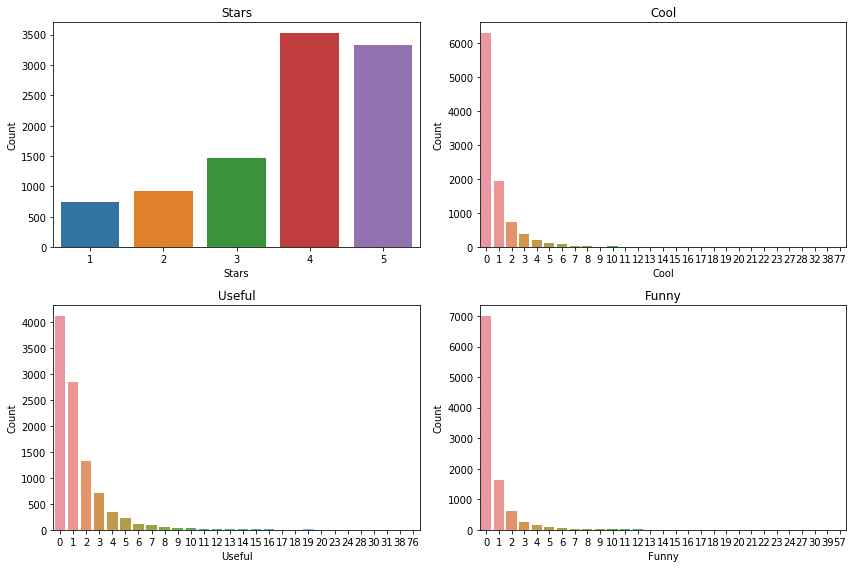

In [7]:
fig = plt.figure(figsize=(12,8))
axes1 = plt.subplot(2,2,1)
axes1 = sns.countplot(x='Stars', data=yelp_df)
axes1.set_title('Stars')
axes1.set_ylabel('Count')

axes2 = plt.subplot(2,2,2)
axes2 = sns.countplot(x='Cool', data=yelp_df)
axes2.set_title('Cool')
axes2.set_ylabel('Count')

axes3 = plt.subplot(2,2,3)
axes3 = sns.countplot(x='Useful', data=yelp_df)
axes3.set_title('Useful')
axes3.set_ylabel('Count')

axes4 = plt.subplot(2,2,4)
axes4 = sns.countplot(x='Funny', data=yelp_df)
axes4.set_title('Funny')
axes4.set_ylabel('Count')

plt.tight_layout()

In [8]:
# In the upper left we see the distribution of stars given, then cool, useful and funny
# 4 and 5 stars were given for around 7000 out of 10k reviews. Cool, useful and funny was given to 20% of the
# total.  Not informative enough to make star predictions.

Text(0.5, 1.0, 'Text Length Distribution')

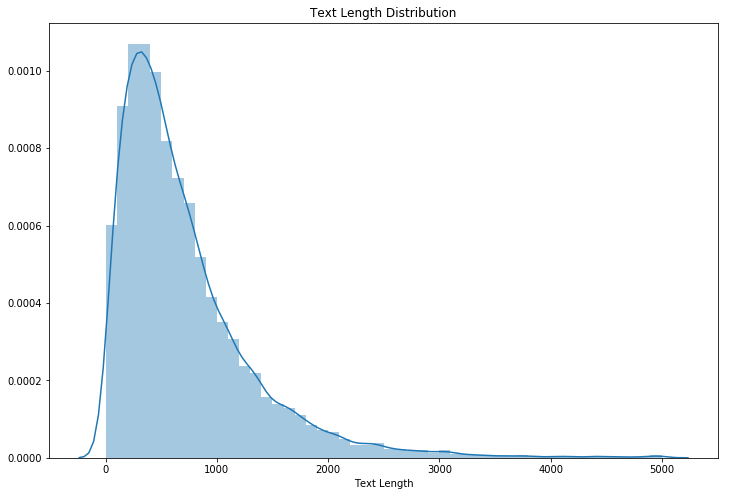

In [9]:
# The distribution of Text Lengths is highest around 500 characters 
fig = plt.figure(figsize=(12,8))
sns.distplot(yelp_df['Text Length'], kde=True, bins=50)
plt.title('Text Length Distribution')

Text(0.5, 1.0, 'Heatmap of Variables')

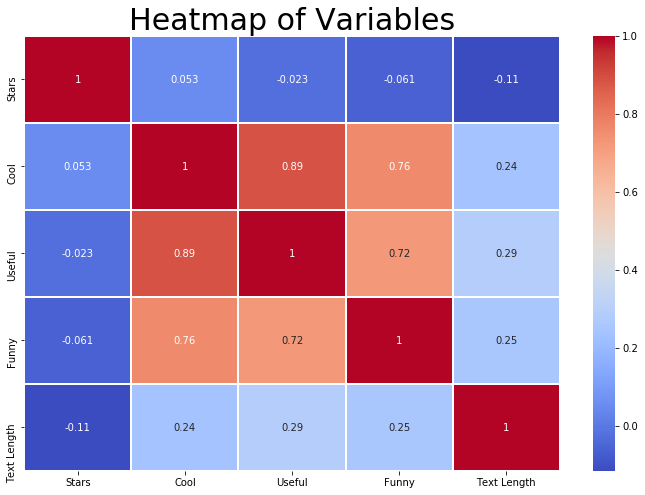

In [10]:
yelp_cor = yelp_df[['Stars', 'Cool', 'Useful', 'Funny', 'Text Length']].corr()

fig = plt.figure(figsize=(12,8))
axes = sns.heatmap(yelp_cor, cmap='coolwarm', linewidth=1, linecolor='white', annot=True)
axes.set_title('Heatmap of Variables', fontsize=30)

Heatmap of Correlation between Target and Other Variables

Not much correlation between stars and other other variables

You can see that the coefficients are close to zero 

Maybe a pairplot will show us more relationships

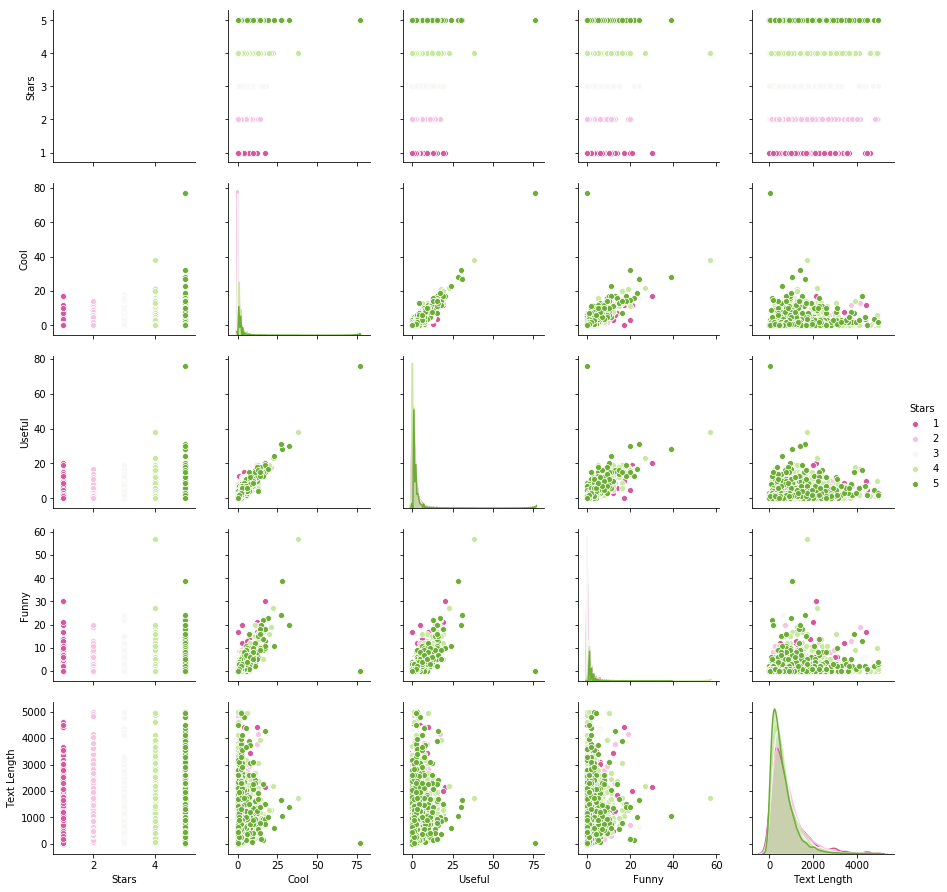

In [11]:
#sns.palplot(sns.color_palette("Set"))
sns.pairplot(yelp_df, hue='Stars', palette='PiYG')

In [12]:
# Striking out here

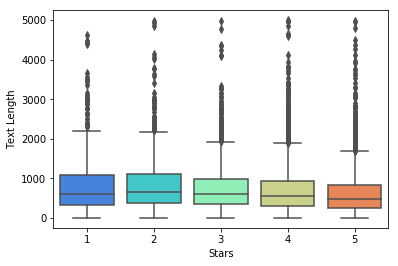

In [13]:
sns.boxplot(x='Stars', y='Text Length', data=yelp_df, palette='rainbow')

**These last three plots show that length, cool, useful and funny will not predict stars.
Its time to focus on the message text.**

### Text Analysis

Now we will start to analyze the text itself. To make this work, we need to remove punctuation and stop words.
NLTK provides the stop words and we use the Python string function to knock out the punctuation.

We combine these into a single function called clean_text(). It will return a cleaned message.

In [14]:
yelp_text = yelp_df[['Stars', 'Text']]
yelp_text.head()

,Stars,Text
0,5,My wife took me here on my birthday for breakf...
1,5,I have no idea why some people give bad review...
2,4,love the gyro plate. Rice is so good and I als...
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,5,General Manager Scott Petello is a good egg!!!...


In [15]:
# Removes punctuation and stopwords

def clean_text(text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    remove_punc = [word for word in text if word not in string.punctuation]
    remove_punc = ''.join(remove_punc)
    return [word.lower() for word in remove_punc.split() if word.lower() not in stopwords.words('english')]

In [16]:
# Just a sample of stopwords from the NLTK corpus

stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

#### All Stars Word Frequency and Word Cloud

In [17]:
# This cell takes 5 minutes to run

yelp_text_allstars = yelp_text.copy()

# Doing two 10,000 string comprehension loops on the text 

yelp_text_allstars['Text'] = yelp_text_allstars['Text'].apply(clean_text)

yelp_text_allstars.count()

Stars    10000
Text     10000
dtype: int64

In [18]:
yelp_text_allstars.count()

Stars    10000
Text     10000
dtype: int64

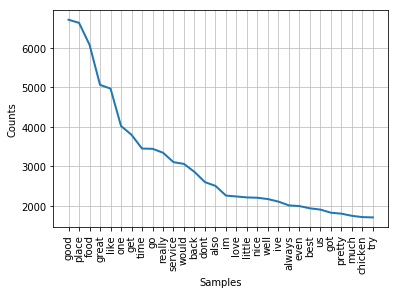

In [19]:
words_split = []
for i in range(0,9999): 
    for word in yelp_text_allstars['Text'][i]:
        words_split.append(word)
FreqDist(words_split).plot(30, cumulative=False)

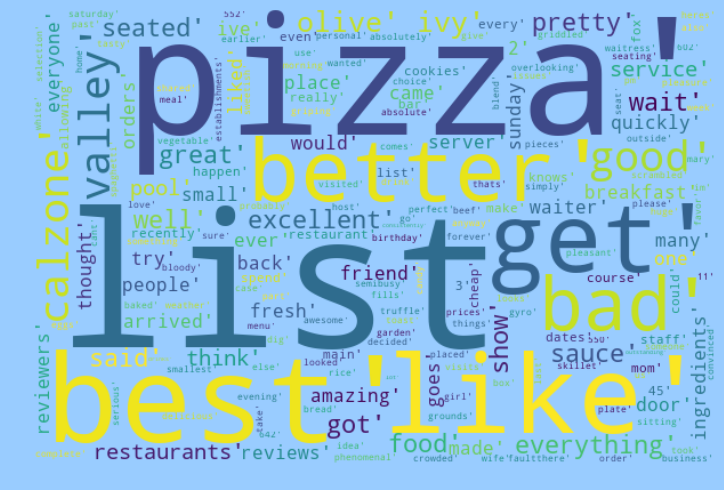

In [20]:
yelp_allstars_text = yelp_text_allstars['Text'].values

wordcloud = WordCloud(
    width = 600,
    height= 400,
    background_color = '#99ccff',
    stopwords = STOPWORDS).generate(str(yelp_allstars_text))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = '#99ccff',
    edgecolor = '#99ccff')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

#### Stars 1 and 5 Words Frequency and Word Cloud

In [21]:
yelp_text_stars1 = yelp_text[yelp_text['Stars']==1]
yelp_text_stars1['Text'] = yelp_text_stars1['Text'].apply(clean_text)
yelp_text_stars1.count()

Stars    749
Text     749
dtype: int64

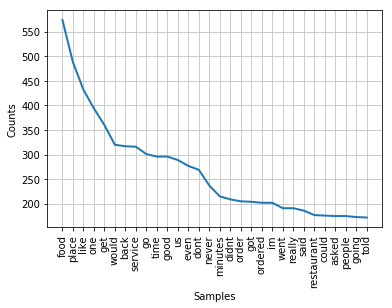

In [22]:
yelp_text_stars1 = yelp_text_stars1.reset_index(drop=True)
words_split = []
for i in range(0,749): 
    for word in yelp_text_stars1['Text'][i]:
        words_split.append(word)
FreqDist(words_split).plot(30, cumulative=False)

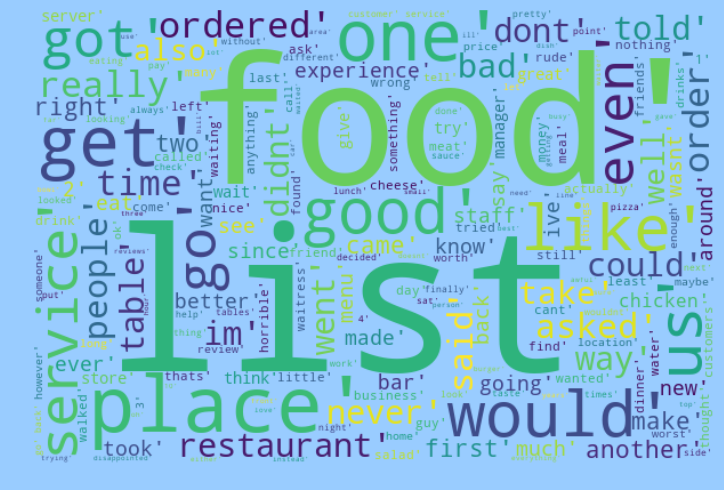

In [23]:
yelp_stars1_text = yelp_text_stars1['Text'].values

wordcloud = WordCloud(
    width = 600,
    height = 400,
    background_color = '#99ccff',
    stopwords = STOPWORDS).generate(str(yelp_stars1_text))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = '#99ccff',
    edgecolor = '#99ccff')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

In [24]:
yelp_text_stars5 = yelp_text[yelp_text['Stars']==5]
yelp_text_stars5['Text'] = yelp_text_stars5['Text'].apply(clean_text)
yelp_text_stars5.count()

Stars    3337
Text     3337
dtype: int64

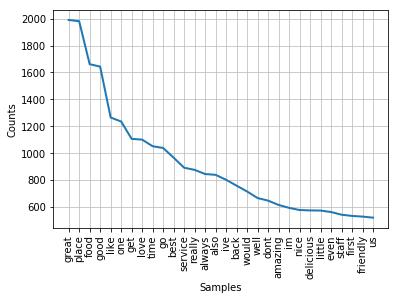

In [25]:
yelp_text_stars5 = yelp_text_stars5.reset_index(drop=True)
words_split = []
for i in range(0,3337): 
    for word in yelp_text_stars5['Text'][i]:
        words_split.append(word)
FreqDist(words_split).plot(30, cumulative=False)

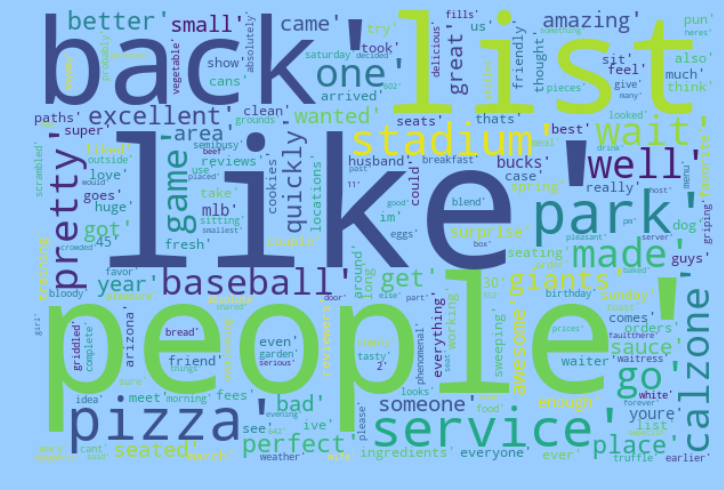

In [26]:
yelp_stars5_text = yelp_text_stars5['Text'].values

wordcloud = WordCloud(
    width = 600,
    height = 400,
    background_color = '#99ccff',
    stopwords = STOPWORDS).generate(str(yelp_stars5_text))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = '#99ccff',
    edgecolor = '#99ccff')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

# Let's build our optimized model and run some predictions

### To determine the best approach to predicting stars for reviews based on text, we will take three paths:

#### A. All Stars


1. Vectorize our corpus of reviews
2. Train on 'all' stars without TF-IDF
3. Iterate to find the optimum split and random state for train_test_split that gives the lowest MSE
4. Now retrain, fit and predict with the optimum split of .1 and random state of 21
5. Run a Classification Report on the accuracy which we see is around .5 (not so good)

#### B. All Stars with Tfidf transform

1. Run a transform using TF-IDF
2. Fit with MNB (Multinomial Naive-Bayes)
3. Iterate to find the optimum split and random state for train_test_split that gives the lowest MSE
4. Setup a pipeline with bow-Classifier(CountVectorizer), Tfidf and MNB
5. Using the pipeline, retrain, fit and predict with the optimum split of .1 and random state of 31
6. Run a Classification Report on the accuracy which we see is around .4 (worse)
    
#### C. 1 and 5 Stars without Tfidf

1. Discard all star ratings except 1 and 5
2. Fit with cv (CountVectorizer)
3. Iterate to find the optimum split and random state for train_test_split that gives the lowest MSE
4. Setup a pipeline with bow-vectorizer and MNB-classifier
5. Using the pipeline, retrain, fit and predict with the optimum split of .1 and random state of 36
6. Run a Classification Report on the accuracy which we see is around .93 which is best 



### A. Prediction from 'All' Stars

Vectorization is the process where words are counted and a sparse matrix of counts is created from it.
Once in this form, it may then be used to predict target labels using a classifier such as multinomial Naive Bayes (MNB in this notebook). MNB requires discrete features such as word counts for text classification. 

As we will see, Step-A uses all stars, B- all stars with Tfidf transform and C- with 1 and 5 stars without Tfidf.

In [27]:
# This iterates over several random states to prove that the results are really accurate (or not)

X = yelp_df['Text']
y = yelp_df['Stars']
cv = CountVectorizer()
X = cv.fit_transform(X)

test_size = np.linspace(0.1, 1, num=9, endpoint=False)
random_state = np.arange(0, 43)
grid_results= []
for testsize in test_size:
    for randomstate in random_state:
        try:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize, random_state=randomstate)
            mnb = MultinomialNB()
            mnb.fit(X_train, y_train)
            y_test_pred = mnb.predict(X_test)     
            grid_results.append([testsize, randomstate, mean_squared_error(y_test, y_test_pred)])
            grid_frame = pd.DataFrame(grid_results)
            grid_frame.rename(columns={0:'Test Size', 1:'Random State', 2:'MSE of Test'}, inplace=True)
        except Exception:
            print(Exception.with_traceback())
            print('error')
            continue
# Show the minimum MSE (lower is better)
min_test_mse = grid_frame[grid_frame['MSE of Test'] == grid_frame['MSE of Test'].min()]
min_test_mse

,Test Size,Random State,MSE of Test
21,0.1,21,0.986


In [ ]:
# The whole grid_frame looks like this:
#grid_frame

In [ ]:
# Now retrain, fit and predict with the optimum split of .1

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=21)
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_test_pred = mnb.predict(X_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           1       0.76      0.51      0.61        69
           2       0.56      0.10      0.17        92
           3       0.25      0.13      0.17       137
           4       0.46      0.68      0.55       373
           5       0.60      0.56      0.58       329

    accuracy                           0.50      1000
   macro avg       0.53      0.40      0.42      1000
weighted avg       0.51      0.50      0.48      1000



### Unimpressive so far

Maybe using all-stars isn't the best approach.

### Prediction with TF-IDF

**Tfidf** is a weighting algorithm that is well explained in [this skymind article]('https://skymind.ai/wiki/bagofwords-tf-idf').


**Tf-idf** looks at intra and inter-document term frequency to arrive at a weight which scales a word's importance.

Although we eventually drop its use in this exercise, it is good to see it in action and what affect it has on the accuracy.

In [29]:
tfidf_transformer = TfidfTransformer().fit(X)
X = tfidf_transformer.transform(X)

grid_results= []
for testsize in test_size:
    for randomstate in random_state:
        try:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize, random_state=randomstate)
            mnb = MultinomialNB()
            mnb.fit(X_train, y_train)
            y_test_pred = mnb.predict(X_test)     
            grid_results.append([testsize, randomstate, mean_squared_error(y_test, y_test_pred)])
            grid_frame = pd.DataFrame(grid_results)
            grid_frame.rename(columns={0:'Test Size', 1:'Random State', 2:'MSE of Test'}, inplace=True)
        except Exception:
            print(Exception.with_traceback())
            print('error')
            continue

min_test_mse = grid_frame[grid_frame['MSE of Test'] == grid_frame['MSE of Test'].min()]
min_test_mse

,Test Size,Random State,MSE of Test
31,0.1,31,1.405


In [30]:
pipeline = Pipeline([('bow', CountVectorizer()), 
                     ('tfidf', TfidfTransformer()), 
                     ('classifier', MultinomialNB())])

X = yelp_df['Text']
y = yelp_df['Stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=31)
pipeline.fit(X_train, y_train)
y_test_pred = pipeline.predict(X_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        61
           2       0.00      0.00      0.00        99
           3       0.00      0.00      0.00       144
           4       0.40      0.94      0.56       358
           5       0.78      0.35      0.48       338

    accuracy                           0.46      1000
   macro avg       0.24      0.26      0.21      1000
weighted avg       0.41      0.46      0.36      1000



When trying to classify Yelp review message text, using all stars and Tf-idf produces poor accuracy. 

### Prediction with bow and Multinomial Naive Bayes

What we will do now is drop Tf-idf and focus on 1 and 5 stars exclusively.

In [31]:
yelp_df12 = yelp_df[(yelp_df.Stars==1) | (yelp_df.Stars==5)]
X = yelp_df12['Text']
y = yelp_df12['Stars']
cv = CountVectorizer()
X = cv.fit_transform(X)

test_size = np.linspace(0.1, 1, num=9, endpoint=False)
random_state = np.arange(0, 43)
grid_results= []
for testsize in test_size:
    for randomstate in random_state:
        try:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize, random_state=randomstate)
            mnb = MultinomialNB()
            mnb.fit(X_train, y_train)
            y_test_pred = mnb.predict(X_test)     
            grid_results.append([testsize, randomstate, mean_squared_error(y_test, y_test_pred)])
            grid_frame = pd.DataFrame(grid_results)
            grid_frame.rename(columns={0:'Test Size', 1:'Random State', 2:'MSE of Test'}, inplace=True)
        except Exception:
            print(Exception.with_traceback())
            print('error')
            continue

min_test_mse = grid_frame[grid_frame['MSE of Test'] == grid_frame['MSE of Test'].min()]
min_test_mse

,Test Size,Random State,MSE of Test
24,0.1,24,0.899756
36,0.1,36,0.899756


### Our results frame shows us the min MSE and what Test Size and Random State produced it.

Now we can run it again using the pipeline of procedures with optimal settings (tuning) and see what the accuracy is now.

In [32]:
pipeline = Pipeline([('bow', CountVectorizer()), 
                     ('classifier', MultinomialNB())])

X = yelp_df12['Text']
y = yelp_df12['Stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=36)
pipeline.fit(X_train, y_train)
y_test_pred = pipeline.predict(X_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           1       0.88      0.69      0.77        67
           5       0.94      0.98      0.96       342

    accuracy                           0.93       409
   macro avg       0.91      0.83      0.87       409
weighted avg       0.93      0.93      0.93       409



In [ ]:
# Note that our pipeline is built from bow and classifier to get to these results
# pipeline

## .93 accuracy is a good result!

We can now predict 1 and 5 stars at .93 accuracy without knowing the star rating in advance.
Using the predictions, we can summarize reviews that have been given these stars and in the case of 1 star glean what is commonly called out for improvement.

With the same approach to 5 stars, we can see what should be continued and reinforced by the restaurant management to keep generating 5 star reviews.

## Conclusions

As you can see, we can use natural language processing to learn what reviewers think about a restaurant. This informs management to change or continue a practice based on words in a review.

We are proving that by using machine learning to solve for 1 or 5 stars (as if the star rating was absent) our model can find words associated with these types of reviews so we can quantify based on natural langage.